![Lena Edge](lena_edge.png)

# Détection de Contours

Objectifs :

- Continuer d'apprendre à extraire des caractéristiques plus abstraites sur des images de façon semi-automatique
- S'initier aux notions de traitement de signal numérique

## Partie 1 : recherche d'information

- À quoi sert la méthode de détection de contours en vision par ordinateur ?
- Qu'est-ce que le domaine du _traitement du signal_ ?
- Quels sont les concepts mathématiques associés à la détection de contours ?
- Trouver les noms et formes de filtres très connus pour la détection de contour

## Partie 2 : extraction de contours

Nous allons utiliser la méthode d'extraction de contours afin d'extraire les caractéristiques d'une image automatiquement.
L'image filtrée deviendra notre nouvelle source de données.

La bibliothèque Pillow implémente l'extraction de contours (et le filtrage numérique en général) via le module
[ImageFilter](https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html).

Etapes :

1. Charger et afficher l'image [`lena.jpg`](lena.jpg)
2. Convertir l'image en niveau de gris (8-bit par pixel)
3. Filtrer l'image pour trouver les contours
4. Afficher les 3 images successives

In [1]:
# YOUR CODE HERE

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndimage

from PIL import Image, ImageFilter
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

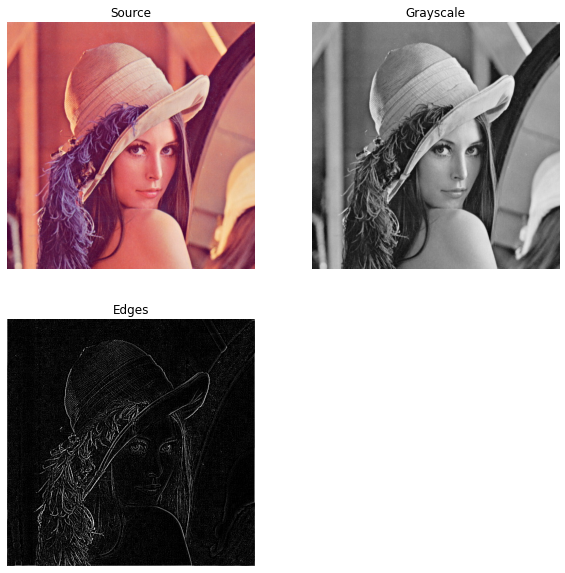

In [3]:
lena = Image.open("lena.jpg")
lena_gray = lena.convert(mode="L")
lena_edge = lena_gray.filter(ImageFilter.FIND_EDGES)

images = [("Source", lena), ("Grayscale", lena_gray), ("Edges", lena_edge)]

plt.figure(figsize=(10, 10))
for i, img in enumerate(images):
    plt.subplot(2, 2, i+1)
    plt.imshow(np.asarray(img[1]), cmap="gray")
    plt.title(img[0])
    plt.axis("off")

## Partie 3 : filtrage numérique

Afin de comprendre un peu mieux le concept derrière le filtrage numérique,
nous allons implémenter par nous-même un détecteur de contour par un opérateur de _convolution_ !

La bibliothèque SciPy permet d'effectuer cette opération mathématique directement sur des Numpy arrays multi-dimensionnels
grâce à la fonction [`scipy.ndimage.convolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html).

Nous utiliserons [l'opérateur de Sobel](https://en.wikipedia.org/wiki/Sobel_operator) en plusieurs étapes :

1. Charger l'image [`square.png`](square.png)
2. Convertir l'image en niveau de gris (8-bit par pixel)
3. Convertir l'image en Numpy array
4. Effectuer un filtrage par convolution sur l'axe horizontal entre l'image source et le _kernel_ de Sobel horizontal :
$$
G_x = 
\begin{bmatrix}
   -1 & 0 & 1 \\
   -2 & 0 & 2 \\
   -1 & 0 & 1 \\
\end{bmatrix}
*
I_{source}
$$

2. Effectuer un filtrage par convolution sur l'axe vertical entre l'image source et le _kernel_ de Sobel vertical :
$$
G_y = 
\begin{bmatrix}
   -1 & -2 & -1 \\
   0 & 0 & 0 \\
   1 & 2 & 1 \\
\end{bmatrix}
*
I_{source}
$$

3. Calculer la combinaison des deux axes pour obtenir l'image filtrée :
$$
G = \sqrt{G_x^2 + G_y^2}
$$

4. Afficher les résultats successifs des 4 images : niveaux de gris, contours horizontaux, contours verticaux, contours globaux

![Convolution Animation](convolution.gif)

In [4]:
# YOUR CODE HERE

(-0.5, 31.5, 31.5, -0.5)

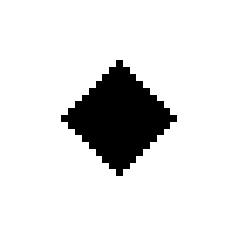

In [5]:
from PIL import Image, ImageDraw

im = Image.new(mode="L", size=(32, 32), color=255)
draw = ImageDraw.Draw(im)
draw.regular_polygon(
    bounding_circle=(im.width/2, im.height/2, im.width/4),
    n_sides=4,
    rotation=45,
    fill=0,
)

plt.imshow(im, cmap="gray")
plt.axis("off")

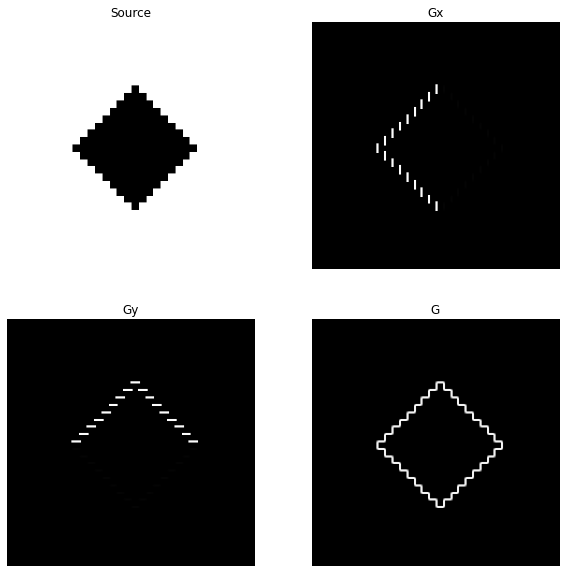

In [6]:
square = Image.open("square.png").convert(mode="L")
source = np.asarray(square)

kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
gx = ndimage.convolve(source, kernel_x)

kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
gy = ndimage.convolve(source, kernel_y)

g = np.sqrt(np.square(gx) + np.square(gy))

images = [("Source", source), ("Gx", gx), ("Gy", gy), ("G", g)]

plt.figure(figsize=(10, 10))
for i, img in enumerate(images):
    plt.subplot(2, 2, i+1)
    plt.imshow(img[1], cmap="gray")
    plt.title(img[0])
    plt.axis("off")

## Partie 4 : extraction de features

Grâce à la méthode de détection de contours, vous avez désormais une nouvelle
méthode d'extraction de features semi-automatique dans votre arsenal !

Appliquer ce concept au jeu de données des digits "MNIST" :

1. Extraire le jeu de données
2. Pré-traiter les images avec la détection de contour pour former les nouvelles features
3. Entrainer et évaluer un classifieur régression logistique
4. Comparer les résultats avec ceux obtenus précédemment

In [7]:
# YOUR CODE HERE

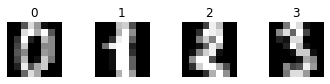

In [8]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(6, 1))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.imshow(image, cmap="gray")
    ax.set_title(label)
    ax.set_axis_off()

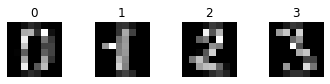

In [9]:
filtered = []
for img in digits.images:
    filtered.append(np.asarray(Image.fromarray(img.astype("uint8")).filter(ImageFilter.FIND_EDGES)))

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(6, 1))
for ax, image, label in zip(axes, filtered, digits.target):
    ax.imshow(image, cmap="gray")
    ax.set_title(label)
    ax.set_axis_off()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.84      0.98      0.90        43
           2       1.00      0.89      0.94        44
           3       0.95      0.93      0.94        45
           4       0.93      1.00      0.96        38
           5       0.96      0.96      0.96        48
           6       0.98      0.98      0.98        52
           7       0.96      0.94      0.95        48
           8       0.88      0.88      0.88        48
           9       0.95      0.89      0.92        47

    accuracy                           0.94       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450



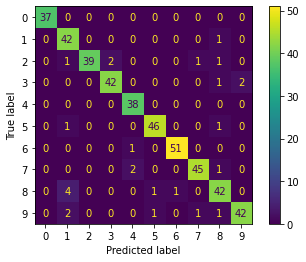

In [10]:
X = np.array(filtered)
X = X.reshape((X.shape[0], X.shape[1] * X.shape[2]))
y = digits.target
class_names = [str(name) for name in digits.target_names]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("classifier", LogisticRegression(random_state=0, max_iter=10000)),
    ]
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

_ = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=class_names,
)

print(classification_report(y_test, y_pred, target_names=class_names))

## Partie 5 : features, quand tu nous tiens

1. Après la détection de contours, continuer le pré-traitement avec une réduction de dimension de type PCA pour générer les features finales
2. Entrainer et évaluer un classifieur
3. Comparer les résultats avec ceux obtenus précédemment

In [11]:
# YOUR CODE HERE